In [ ]:
# Creamos el entorno virtual y lo activamos (en bash) esto hace que todas las librerias que descarguemos se nos guarden, el kernel lo seleccionamos tambien a partir de environment
python -m venv proyecto_abril
source proyecto_abril/Scripts/activate
 
    # Librerias
pip install pandas
pip install seaborn 
pip install scipy
pip install statsmodels



# ls "C:\Users\tyssa\OneDrive\Escritorio\Proyecto Abril Master Data Science\data.csv" Para comprobar que la ruta esta bien y el archivo se encuentra ahi

# En python
import pandas as pd 
ruta = "C:/Users/tyssa/OneDrive/Escritorio/Proyecto Abril Master Data Science/data.csv"
df = pd.read_csv(ruta)
print(df.head())


filas, columnas = df.shape
print(f"El archivo tiene {filas} filas y {columnas} columnas.")
# cancer_code es el tipo de cancer (son 170 pero porque hay subtipos)

print(df.columns)
print(df['py'].head()) # Es person-year: tiempo durante el cual una población ha sido observada

#La tasa de incidencia la calcualmos con py y cases.  TI =  cases / py x 100000 (tasa de incidencia por 100 mil personas)

In [ ]:
# Hay dos bases mas: una con info y codigos sobre los tipos de cancer (cancer_dict)
# otra con info sobre los continentes, razas...(id_dict)
# Abrimos para verlas

#Cancer_dict
ruta2 = "C:/Users/tyssa/OneDrive/Escritorio/Proyecto Abril Master Data Science/cancer_dict.csv"  
df_cancer_dict = pd.read_csv(ruta2)
print(df_cancer_dict.head())
filas, columnas = df_cancer_dict.shape
print(f"El archivo tiene {filas} filas y {columnas} columnas.")
print(df_cancer_dict.columns)


# Parece que la columna 'histo_label' tenia muchos NA por eso lo comprobamos 
na_count = df_cancer_dict['histo_label'].isna().sum()
no_na_count = df_cancer_dict['histo_label'].notna().sum()
print(f"Cantidad de NA en 'histo_label': {na_count}") #60
print(f"Cantidad de valores no NA en 'histo_label': {no_na_count}") #110

# Mostrar los valores no NA de la columna 'histo_label'
valores_no_na = df_cancer_dict['histo_label'].dropna().unique()
print("Valores no NA en 'histo_label':", valores_no_na) # Son los subtipos


# id_dict
ruta3= "C:/Users/tyssa/OneDrive/Escritorio/Proyecto Abril Master Data Science/id_dict.csv"
df_id_dict = pd.read_csv(ruta3)
print(df_id_dict.head())

filas, columnas = df_id_dict.shape
print(f"El archivo tiene {filas} filas y {columnas} columnas.")
print(df_id_dict.columns) #Parece que id_code y registry_code son las mismas 

   cancer_code                             cancer_label       icd10  \
0            1  All cancers excluding non-melanoma skin  C00-96/C44   
1            2                                      Lip         C00   
2            3                                   Tongue      C01-02   
3            4                                    Mouth      C03-06   
4            5                          Salivary glands      C07-08   

  histo_label  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
El archivo tiene 170 filas y 4 columnas.
Index(['cancer_code', 'cancer_label', 'icd10', 'histo_label'], dtype='object')
Cantidad de NA en 'histo_label': 60
Cantidad de valores no NA en 'histo_label': 110
Valores no NA en 'histo_label': ['Squamous cell carcinoma' 'Adenocarcinoma' 'Other specified carcinomas'
 'Unspecified carcinoma' 'Sarcoma' 'Other specified morphology'
 'Unspecified morphology' 'Other specified carcinoma' 'Melanoma'
 'Other morphology' 'Hepatocellular car

In [3]:
# Fusion de las tres bases
# Tienen columnas en comun asi que vamos a unirlo con merge

# Podemos unir df con df_cancer_dict a traves de la columna cancer_code
df_merged = pd.merge(df, df_cancer_dict, on="cancer_code", how="left")

# Ahora lo unimos con id_dict a traves de la columna id_code
df_final = pd.merge(df_merged, df_id_dict, on="id_code", how="left")

# Nuestra base toda unida es df_final
print(df_final.head())
filas, columnas = df_final.shape
print(f"El archivo tiene {filas} filas y {columnas} columnas.")

    id_code  sex  cancer_code  age  cases       py  year  \
0  80000299    1            1    1     30  96307.0  1993   
1  80000299    1            1    2     18  66677.0  1993   
2  80000299    1            1    3     11  59556.0  1993   
3  80000299    1            1    4      8  60462.0  1993   
4  80000299    1            1    5     30  72770.0  1993   

                              cancer_label       icd10 histo_label  \
0  All cancers excluding non-melanoma skin  C00-96/C44         NaN   
1  All cancers excluding non-melanoma skin  C00-96/C44         NaN   
2  All cancers excluding non-melanoma skin  C00-96/C44         NaN   
3  All cancers excluding non-melanoma skin  C00-96/C44         NaN   
4  All cancers excluding non-melanoma skin  C00-96/C44         NaN   

   CI5_continent                 id_label  ethnic_code  country_code  \
0              1  Uganda, Kyadondo County           99           800   
1              1  Uganda, Kyadondo County           99           800   
2 

In [ ]:
# Hay muchos datos, a mi los que mas me interesan son los canceres de cerebro
# Cerebro, sistema nervioso central (C71-72)
#    Tumores astrociticos
#    Tumores oligodendrogliales y gliomas mixtos
#    Tumores ependimarios
#    Gliomas, otros
#    Meduloblastoma
#    Otros tumores embrionarios
#    Otros tumores neuroepiteliales
#    Otra morfologia especificada
#    Morfologia no especificada

print(df_final['cancer_label'].head())

# df_brain para quedarnos solo con las filas del cancer de cerebro
df_brain = df_final[df_final['cancer_label'].str.contains("brain", case=False, na=False)]
print(df_brain.head())
filas, columnas = df_brain.shape
print(f"El archivo tiene {filas} filas y {columnas} columnas.") # 1 366 860

# Si cases = 0, si hay registro pero no esta verificado
num_filas_cero = (df_brain['cases'] == 0).sum()
print("Número de filas con cases = 0:", num_filas_cero) # 1 045 134


# Eliminar filas donde 'cases' sea 0
df_brain = df_brain[df_brain['cases'] != 0]

# Cuantas filas quedan
print("Número de filas después de eliminar:", len(df_brain)) # Si cuadra: 321 726

print(df_brain['cases'].isna().sum()) # No hay NA en 'cases' 

# Vamos a ver si hay columnas duplicadas
print(df_brain.columns)

print(df_brain[['registry_code', 'id_code']]) # Es lo mismo solo que en registry_code se borran los dos ultimos numeros 
print(df_brain[['id_code', 'country_code','registry_code', 'CI5_continent', 'id_label']])
# Eliminamos registry_code 
df_brain = df_brain.drop(columns=['registry_code'])


# ¿Entre que edades estan comprendidos estas enfermedades? De 1 a 19 años 
# no es así, significa que hay 18 grupos de edad, hay una tabla don de se ponen las agrupaciones
print(sorted(df_brain['age'].unique().tolist()))

# ¿Entre que años se recogieron estos datos? 1953-2017
print(df_brain['year'])
print(sorted(df_brain['year'].unique().tolist()))

0    All cancers excluding non-melanoma skin
1    All cancers excluding non-melanoma skin
2    All cancers excluding non-melanoma skin
3    All cancers excluding non-melanoma skin
4    All cancers excluding non-melanoma skin
Name: cancer_label, dtype: object
       id_code  sex  cancer_code  age  cases       py  year  \
2489  80000299    1          132    1      0  96307.0  1993   
2490  80000299    1          132    2      0  66677.0  1993   
2491  80000299    1          132    3      0  59556.0  1993   
2492  80000299    1          132    4      0  60462.0  1993   
2493  80000299    1          132    5      0  72770.0  1993   

                       cancer_label   icd10 histo_label  CI5_continent  \
2489  Brain, central nervous system  C71-72         NaN              1   
2490  Brain, central nervous system  C71-72         NaN              1   
2491  Brain, central nervous system  C71-72         NaN              1   
2492  Brain, central nervous system  C71-72         NaN           

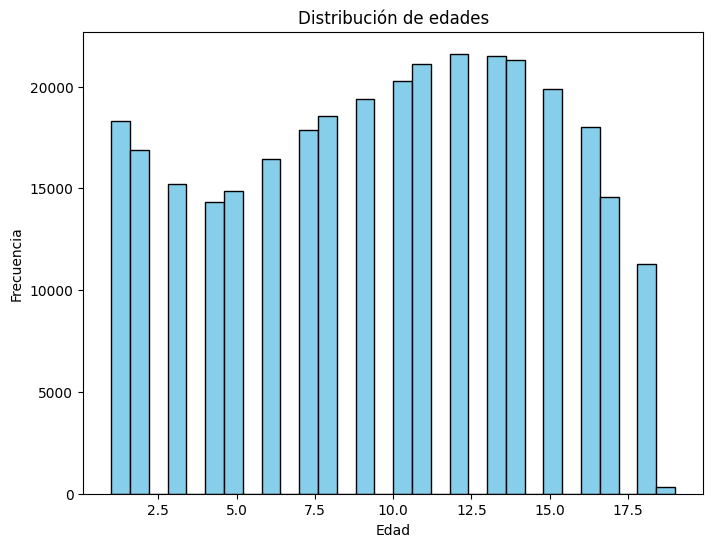

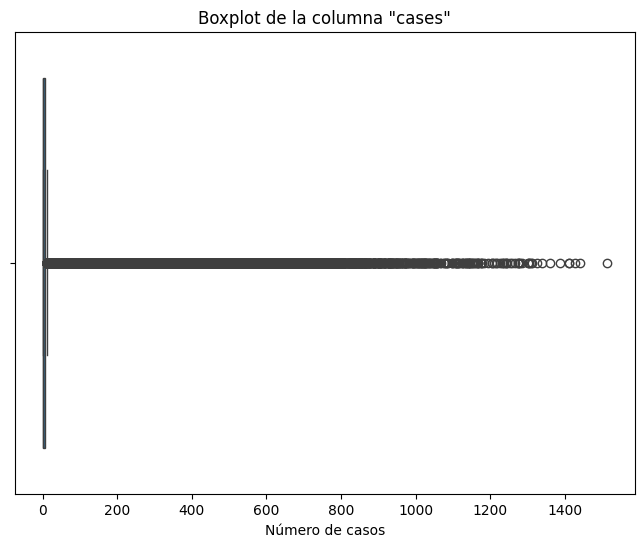

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

C:\Users\tyssa\AppData\Local\Temp\ipykernel_9904\2126321603.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_brain, palette='viridis')


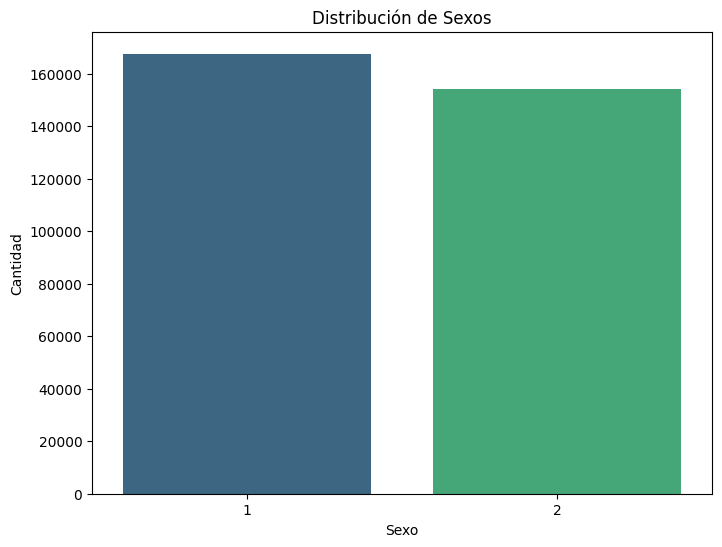

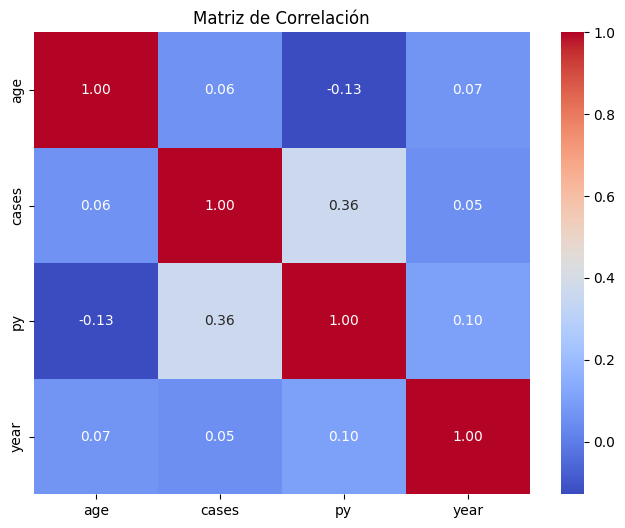

In [ ]:
# Aproximaciones visuales a ver si nos quitamos algun dato
# Histogramas o boxplot para ver valores atipicos

import matplotlib.pyplot as plt

import seaborn as sns

# Histograma para la columna 'age'
plt.figure(figsize=(8,6))
plt.hist(df_brain['age'], bins=range(1, 20), align='left', color='skyblue', edgecolor='black')
plt.title('Distribución de grupos de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 19))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Gráfico de barras para 'sex'
plt.figure(figsize=(8,6))
sns.countplot(x='sex', data=df_brain, palette='viridis')
plt.title('Distribución de Sexos')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


318
1362
       id_code  sex  cancer_code  age  cases       py  year  \
2501  80000299    1          132   13      1   4026.0  1993   
2520  80000299    1          133   13      1   4026.0  1993   
5720  80000299    1          132    2      1  70051.0  1994   
5727  80000299    1          132    9      1  19206.0  1994   
5891  80000299    1          141    2      1  70051.0  1994   

                       cancer_label   icd10             histo_label  \
2501  Brain, central nervous system  C71-72                     NaN   
2520  Brain, central nervous system  C71-72      Astrocytic tumours   
5720  Brain, central nervous system  C71-72                     NaN   
5727  Brain, central nervous system  C71-72                     NaN   
5891  Brain, central nervous system  C71-72  Unspecified morphology   

      CI5_continent                 id_label  ethnic_code  country_code  \
2501              1  Uganda, Kyadondo County           99           800   
2520              1  Uganda, Kyadon

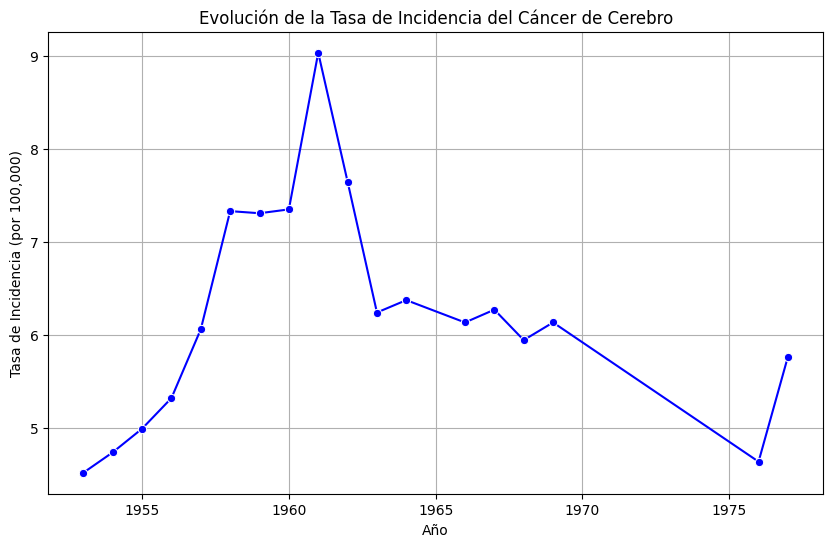

C:\Users\tyssa\AppData\Local\Temp\ipykernel_9904\4240758994.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_evolucion = df_brain_cleaned.groupby('year').apply(
C:\Users\tyssa\AppData\Local\Temp\ipykernel_9904\4240758994.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the op

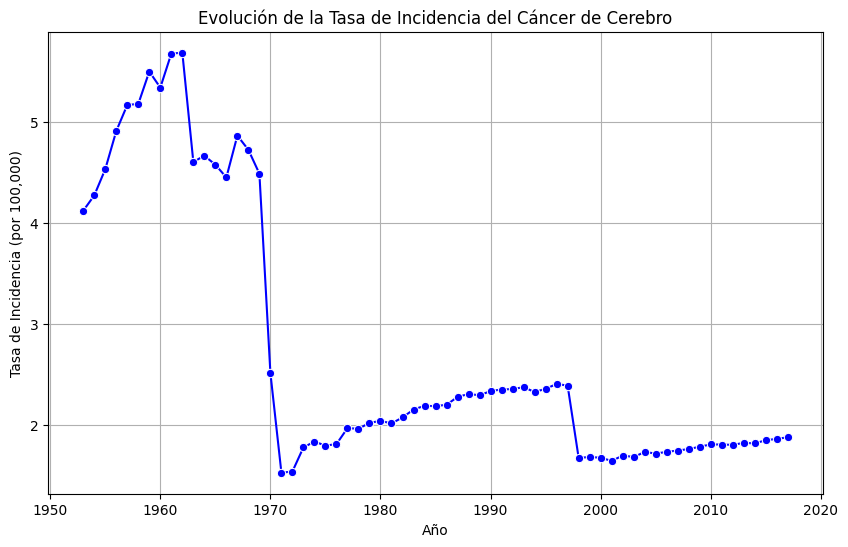

    year  incidence_rate
0   1953        4.120202
1   1954        4.270987
2   1955        4.530450
3   1956        4.907720
4   1957        5.165367
..   ...             ...
60  2013        1.825757
61  2014        1.820214
62  2015        1.851821
63  2016        1.864726
64  2017        1.880932

[65 rows x 2 columns]


In [ ]:

# Comprobar la columna py antes de empezar 
print(df_brain['py'].isna().sum())  # Ver cuántos valores nulos hay en 'py' 318
print((df_brain['py'] == 0).sum())  # Ver cuántos ceros hay en 'py' 1362


# Calculamos la TASA DE INCIDENCIA

df_brain['incidence_rate'] = (df_brain['cases'] / df_brain['py']) * 100000
print(df_brain.head())  
print(df_brain.columns) 

#Colocar la nueva columna despues de 'py'
columnas_ordenadas = df_brain.columns.tolist()
columnas_ordenadas.remove('incidence_rate') # Hay que borrarla porque sino se duplica no se mueve de lugar
posicion = columnas_ordenadas.index('py') + 1
columnas_ordenadas.insert(posicion, 'incidence_rate')
df_brain = df_brain[columnas_ordenadas]
print(df_brain['incidence_rate'].head())  

df_brain = df_brain.loc[:, ~df_brain.columns.duplicated()]  # Elimina columnas duplicadas


# Group by 'year' para ver la evolucion del cancer a lo largo del tiempo
# No salen todos los años por los valores nulos en 'py'
df_evolucion = df_brain.groupby('year')['incidence_rate'].mean().reset_index()
print(df_evolucion.head())


import matplotlib.pyplot as plt
import seaborn as sns

# En este no salen todos los años por los valores nulos
plt.figure(figsize=(10,6))
sns.lineplot(x=df_evolucion['year'], y=df_evolucion['incidence_rate'], marker='o', color='b')
plt.title('Evolución de la Tasa de Incidencia del Cáncer de Cerebro')
plt.xlabel('Año')
plt.ylabel('Tasa de Incidencia (por 100,000)')
plt.grid(True)
plt.show()


# Vamos a hacer lo mismo pero eliminando los 0 y los NA de 'py'
df_brain_cleaned = df_brain[(df_brain['py'] > 0) & df_brain['py'].notna()]

df_evolucion = df_brain_cleaned.groupby('year').apply(
    lambda x: (x['cases'].sum() / x['py'].sum()) * 100000
).reset_index(name='incidence_rate')

# Asegurarse de que todos los años estén representados (incluso si no hay datos para un año)
all_years = pd.DataFrame({'year': range(df_brain['year'].min(), df_brain['year'].max() + 1)})
df_evolucion_completa = pd.merge(all_years, df_evolucion, on='year', how='left')

# Rellenar NaN con 0 si no hay datos para un año
df_evolucion_completa['incidence_rate'].fillna(0, inplace=True)


plt.figure(figsize=(10,6))
sns.lineplot(x=df_evolucion_completa['year'], y=df_evolucion_completa['incidence_rate'], marker='o', color='b')
plt.title('Evolución de la Tasa de Incidencia del Cáncer de Cerebro')
plt.xlabel('Año')
plt.ylabel('Tasa de Incidencia (por 100,000)')
plt.grid(True)
plt.show()


print(df_evolucion_completa) 

C:\Users\tyssa\AppData\Local\Temp\ipykernel_9904\1582734125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brain_cleaned['incidence_rate'] = (df_brain_cleaned['cases'] / df_brain_cleaned['py']) * 100000


       id_code  sex  cancer_code  age  cases       py  incidence_rate  year  \
2501  80000299    1          132   13      1   4026.0       24.838549  1993   
2520  80000299    1          133   13      1   4026.0       24.838549  1993   
5720  80000299    1          132    2      1  70051.0        1.427531  1994   
5727  80000299    1          132    9      1  19206.0        5.206706  1994   
5891  80000299    1          141    2      1  70051.0        1.427531  1994   

                       cancer_label   icd10             histo_label  \
2501  Brain, central nervous system  C71-72                     NaN   
2520  Brain, central nervous system  C71-72      Astrocytic tumours   
5720  Brain, central nervous system  C71-72                     NaN   
5727  Brain, central nervous system  C71-72                     NaN   
5891  Brain, central nervous system  C71-72  Unspecified morphology   

      CI5_continent                 id_label  ethnic_code  country_code  
2501              1  Uga

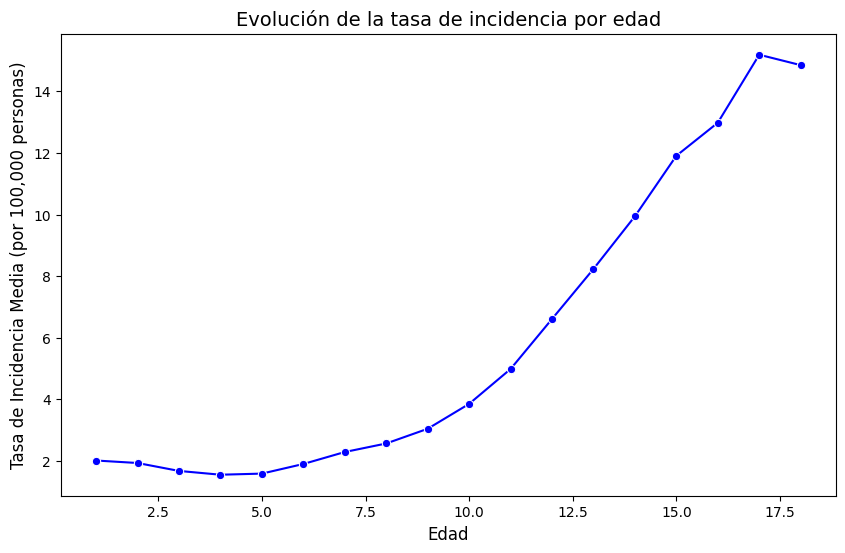

[13  2  9  8  5 10  1  7 14  3 12  4  6 11 16 15 17 18]
   sex  incidence_rate
0    1        6.633787
1    2        5.009792


C:\Users\tyssa\AppData\Local\Temp\ipykernel_9904\1582734125.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='incidence_rate', data=df_sex_grouped, palette='Set2')


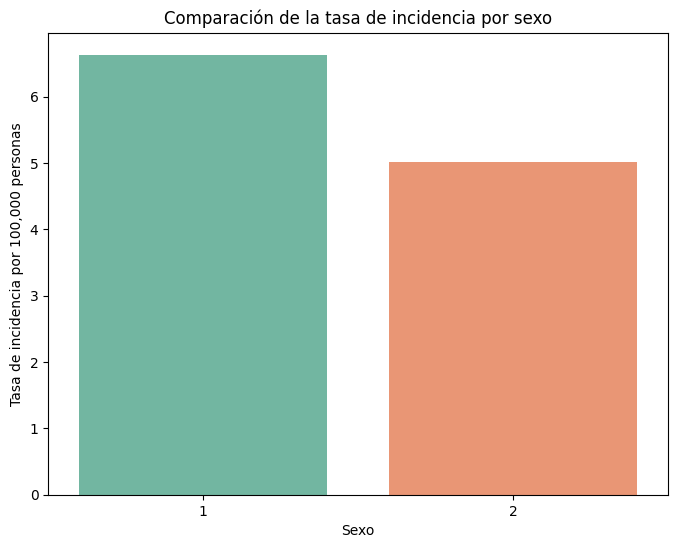

In [ ]:
# Nuevo df con los 0 y NA quitados de 'py'

df_brain_cleaned = df_brain[(df_brain['py'] > 0) & df_brain['py'].notna()]
df_brain_cleaned['incidence_rate'] = (df_brain_cleaned['cases'] / df_brain_cleaned['py']) * 100000
df_brain2 = df_brain_cleaned.copy()

print(df_brain2.head())


# Agrupar por 'age' y calcular la media de la tasa de incidencia (incidence_rate)
grouped_by_age = df_brain2.groupby('age').agg(
    incidence_rate_mean=('incidence_rate', 'mean'),
    cases_sum=('cases', 'sum'),
    py_sum=('py', 'sum')
).reset_index()

print(grouped_by_age.head())

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_by_age, x='age', y='incidence_rate_mean', marker='o', color='b')
plt.title('Evolución de la tasa de incidencia por edad', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Tasa de Incidencia Media (por 100,000 personas)', fontsize=12)
plt.xticks(range(1, 19))  
plt.show()



# Vamos a ver la tasa de incidencia por sexo
df_sex_grouped = df_brain2.groupby('sex').agg({
    'incidence_rate': 'mean'
}).reset_index()

print(df_sex_grouped) # 1 con incidencia de  6.633787 y 2 con 5.009792


plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='incidence_rate', data=df_sex_grouped, palette='Set2')

plt.title('Comparación de la tasa de incidencia por sexo')
plt.xlabel('Sexo')
plt.ylabel('Tasa de incidencia por 100,000 personas')
plt.show()


In [ ]:
# Estadisticas de tendencia central para la tasa de incidencia
import scipy.stats as stats

# Media: 5.86
media = df_brain2['incidence_rate'].mean() 

# Mediana: 2.46
mediana = df_brain2['incidence_rate'].median() 

# Moda: 1.35 (frecuencia: 19)
moda = stats.mode(df_brain2['incidence_rate'], keepdims=True)  # keepdims=True evita warning

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda.mode[0]:.2f} (frecuencia: {moda.count[0]})") 


In [ ]:
# Medidas de dispersión: rango, varianza, desviación estándar, percentiles
# Rango (máximo - mínimo): 877.18
rango = df_brain2['incidence_rate'].max() - df_brain2['incidence_rate'].min()

# Varianza: 86.98
varianza = df_brain2['incidence_rate'].var()

# Desviación estándar: 9.33
desviacion = df_brain2['incidence_rate'].std()

# Percentiles
percentiles = df_brain2['incidence_rate'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f"Rango: {rango:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Percentiles: {percentiles}")
# Percentiles: 
# 0.25     0.773202
# 0.50     2.463691
# 0.75     7.260752
# 0.90    15.830856
# 0.95    22.489213
# 0.99    39.525692


In [ ]:
# Distribuciones
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 4))

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df_brain2['incidence_rate'], color='lightgreen')
plt.title('Boxplot de la tasa de incidencia')
plt.xlim(0, 50)

plt.tight_layout()
plt.show()


# KDE
plt.subplot(1, 3, 3)
sns.kdeplot(df_brain2['incidence_rate'], color='purple', fill=True)
plt.title('KDE: Distribución suavizada')
plt.xlim(0, 50)  # Limitar el eje X de 0 a 50

plt.tight_layout()
plt.show()


In [ ]:
# Correlaciones entre variables numericas
# Selección de columnas numéricas
numeric_df = df_brain2[['cases', 'py', 'incidence_rate', 'age', 'year']]

# Matriz de correlación
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()




# Contraste de hipotesis: diferencias de la tasa de incidencia entre sexos
from scipy.stats import ttest_ind

# Separar los datos por sexo
hombres = df_brain2[df_brain2['sex'] == 1]['incidence_rate']
mujeres = df_brain2[df_brain2['sex'] == 2]['incidence_rate']

# Prueba t de Student
t_stat, p_value = ttest_ind(hombres, mujeres, equal_var=False) 

print(f"T-statistic: {t_stat:.2f}") # 49.94
print(f"P-value: {p_value:.4f}") # 0



# Modelo de regresion lineal
import statsmodels.api as sm

# Variables independientes (predictoras)
X = df_brain2[['age', 'sex', 'year']]
X = sm.add_constant(X)  # añade intercepto

# Variable dependiente
y = df_brain2['incidence_rate']

model = sm.OLS(y, X).fit()
print(model.summary())



NameError: name 'df_brain2' is not defined

In [ ]:
# Guardamos el csv
df_brain2.to_csv("cancer_brain_cleaned.csv", index=False)
df_brain2.to_csv("cancer_brain_cleaned.csv", index=False, decimal='.')
